# Homework 2: U.S. Boundary Currents

Name: Andre Rivera

Date: 2/4/25

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [1]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [2]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_east = xr.open_dataset('EVEL_2015_12.nc')
ds_north = xr.open_dataset('NVEL_2015_12.nc')

In [3]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(ds_east['EVEL'])
nvel = np.array(ds_north['NVEL'])
lon = np.array(ds_east['longitude'])
lat = np.array(ds_east['latitude'])


Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

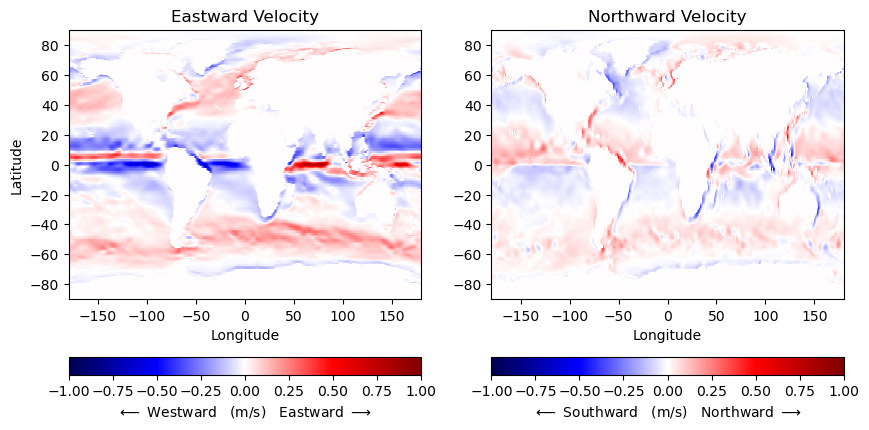

In [4]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,evel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$' )
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')


# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,nvel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$' )
plt.xlabel('Longitude')
plt.title('Northward Velocity');


### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

# Responses:
1. At 30&deg;N in the US, surface currents are moving west-northward in the east coast and west-southward in the west coast. At 40&deg;N in the US, surfaces currents are moving east-northward in the east and east-southward in the west coast.
2. Looking at the strength's of the velocitys, the east coast seems to be stronger.
3. The current in the North Atlantic Gyre travels clockwise. This links up with the east coast, with it going from west-northward to east-northward. Additionally, the current in the North Pacific Gyre also travels clockwise. This links up with the west coast, with it going from west-southward to east-southward.

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [5]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
# start by opening the data sets:
ds_theta= xr.open_dataset("./THETA_2015_12.nc")
ds_theta

<xarray.Dataset> Size: 104MB
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    Z          (k) float32 200B ...
    timestep   (time) int64 8B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    THETA      (time, k, j, i) float64 104MB ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Thu Aug 22 19:28:22 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [6]:
# store the THETA grid into a into numpy array
theta = np.array(ds_theta['THETA'])

# in addition, make variables for longitude and latitude
long = np.array(ds_theta['longitude'])
lat = np.array(ds_theta['latitude'])

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

Text(0.5, 0, 'Longitude')

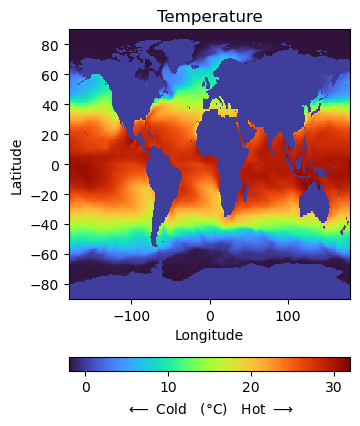

In [7]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data
plt.subplot(1,2,1)
C = plt.pcolormesh(long,lat,theta[0, 0, :, :], vmin = -2, vmax=32, cmap='turbo')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Cold   ($\degree$C)   Hot $\longrightarrow$' )
plt.title('Temperature')
plt.ylabel('Latitude')
plt.xlabel('Longitude')


### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

# Responses
1. In general, the water temperatures in the east coast of the U.S. are warmer than the west coast of the U.S. at the same latitude

2. On the east coast, the North Atlantic Gyre brings warm water from the south to the north. Meanwhile, the North Pacific Gyre brings cold water from the north to the south. This means that water on the east coast will generally be warmer because of the currents while water on the west coast will be colder.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [8]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_wvel = xr.open_dataset("./WVELSTAR_2015_12.nc")
ds_wvel

<xarray.Dataset> Size: 104MB
Dimensions:    (i: 720, j: 360, k_l: 50, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * k_l        (k_l) int64 400B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    timestep   (time) int64 8B ...
    Zl         (k_l) float32 200B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    WVELSTAR   (time, k_l, j, i) float64 104MB ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      0.0
    date_created:                 Tue Aug 27 18:20:19 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [9]:
# store the WVELSTAR grid into a into numpy array
wvel = np.array(ds_wvel['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [10]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
depth = np.array(ds_wvel['Zl'])


Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

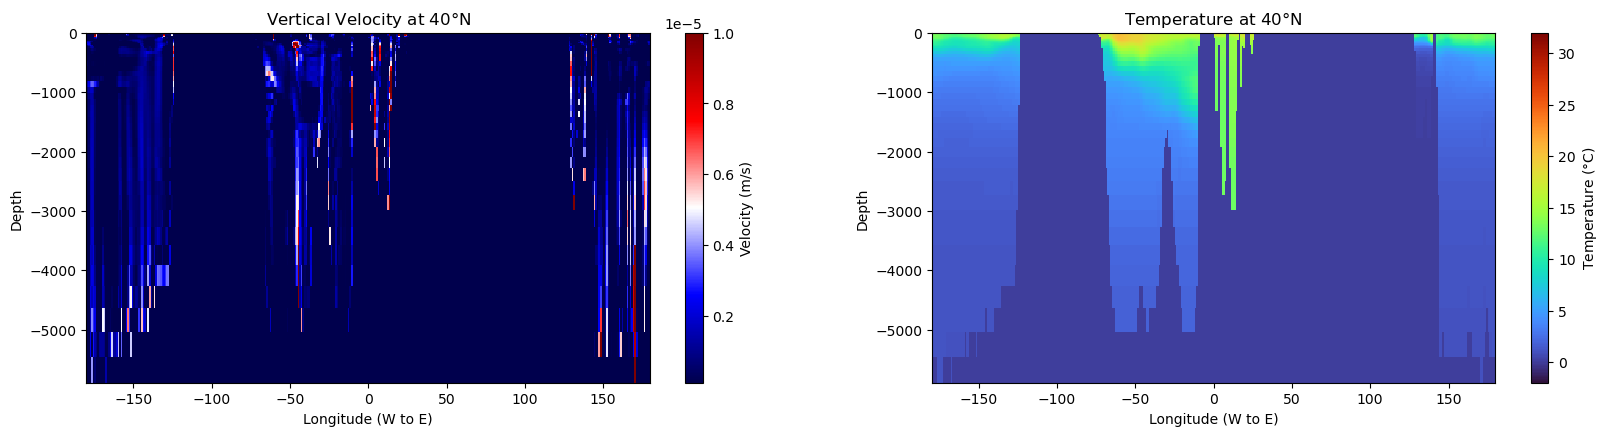

In [11]:
# make a figure
fig = plt.figure(figsize=(20,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
lat =  np.array(ds_wvel['latitude'])
lon = np.array(ds_wvel['longitude'])

plt.subplot(2,2,1)
C = plt.pcolormesh(lon,depth,wvel[0, :, 259, :], vmin=0.0000001, vmax=0.00001, cmap="seismic")
plt.colorbar(C, label='Velocity (m/s)' )
plt.title('Vertical Velocity at 40$\degree$N')
plt.ylabel('Depth')
plt.xlabel('Longitude (W to E)');

# make a subplot of the vertical profile of temperature
plt.subplot(2,2,2)
C = plt.pcolormesh(lon,depth,theta[0, :, 259, :], vmin=-2, vmax=32, cmap="turbo")
plt.colorbar(C, label='Temperature ($\degree$C)' )
plt.title('Temperature at 40$\degree$N')
plt.ylabel('Depth')
plt.xlabel('Longitude (W to E)');



### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

# Repsonses
Note: At 40&deg;N, east coast is 83&deg;W and west coast is 124&deg;W

1. In the west coast, the vertical velocity 